# Análise Superstore

## Otávio Marinho

O trabalho tem como objetivo fazer uma análise geral das vendas e tendências da loja fictícia Superstore usando ferramentas de limpeza e análise de dados em Python, além de trazer insights e recomendações. Os dados foram retirados do [Kaggle](https://kaggle.com). 

O dataset original (train.csv) contém 9800 linhas e 18 colunas. 

[Fonte](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting)

[Licença](https://www.gnu.org/licenses/old-licenses/gpl-2.0.en.html)

## **Importando Dados e Bibliotecas**

Bibliotecas que foram utilizadas no projeto e uma visão geral do dataset.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='dark')

sales = pd.read_csv('train.csv')

sales.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

## Limpeza de Dados

Foram encontradas colunas fora do formato ideal, alguns valores vazios (código postal, não foram utilizados na análise e não tem valor estatístico, então foram substituídos por zero) e nenhum outlier.

In [30]:
sales['Postal Code'] = sales['Postal Code'].fillna(0)

sales['Order Date'] = pd.to_datetime(sales['Order Date'], format = '%d/%m/%Y')

sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], format = '%d/%m/%Y')

print(sales.shape)


(9800, 18)


## Vendas por Categoria

### Quais são os tipos de produto mais vendidos? De quais categorias?

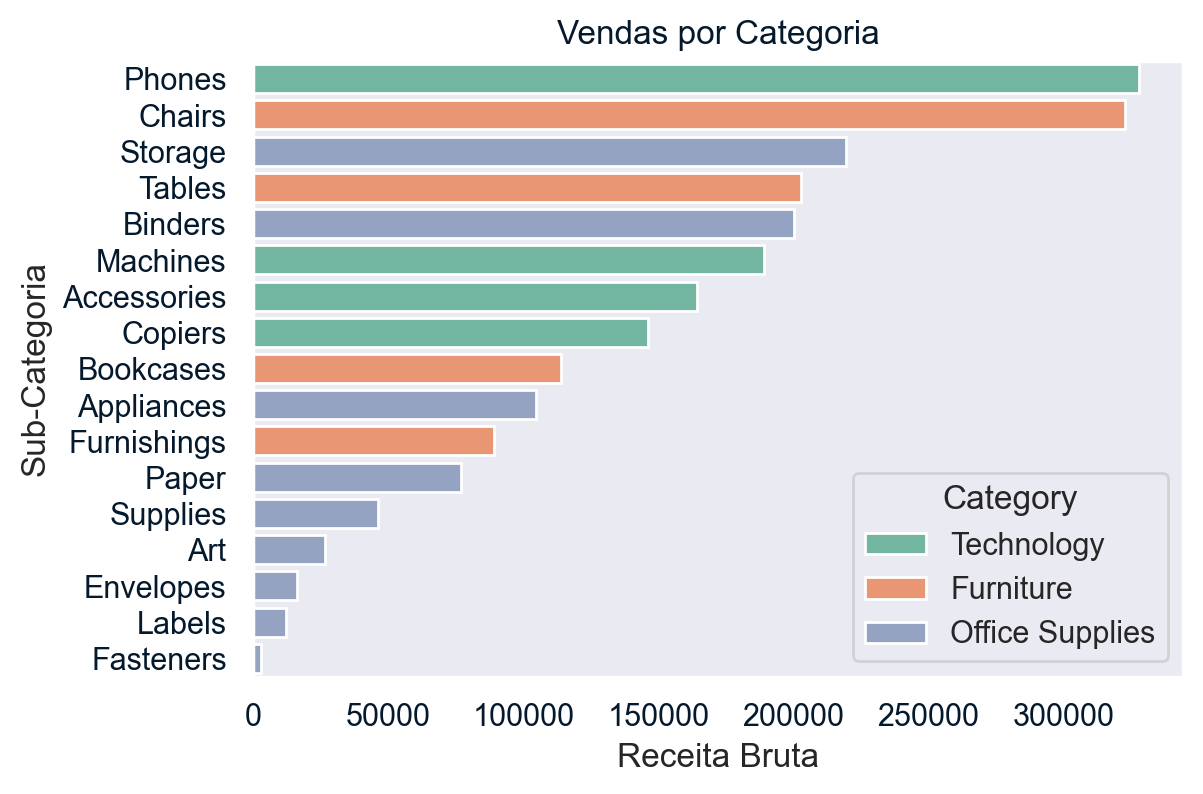

In [31]:
# Vendas por categoria
plt.figure(figsize=(6,4))
sales_category = sales.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data = sales_category, x = 'Sales', y = 'Sub-Category', hue = 'Category', palette = 'Set2')
plt.title('Vendas por Categoria')
plt.xlabel('Receita Bruta')
plt.ylabel('Sub-Categoria')
plt.show()

Vemos os produtos mais populares e uma pequena diferença entre a receita da área de tecnologia e mobília quando comparadas à de material de escritório.

## Qual o produto mais popular?

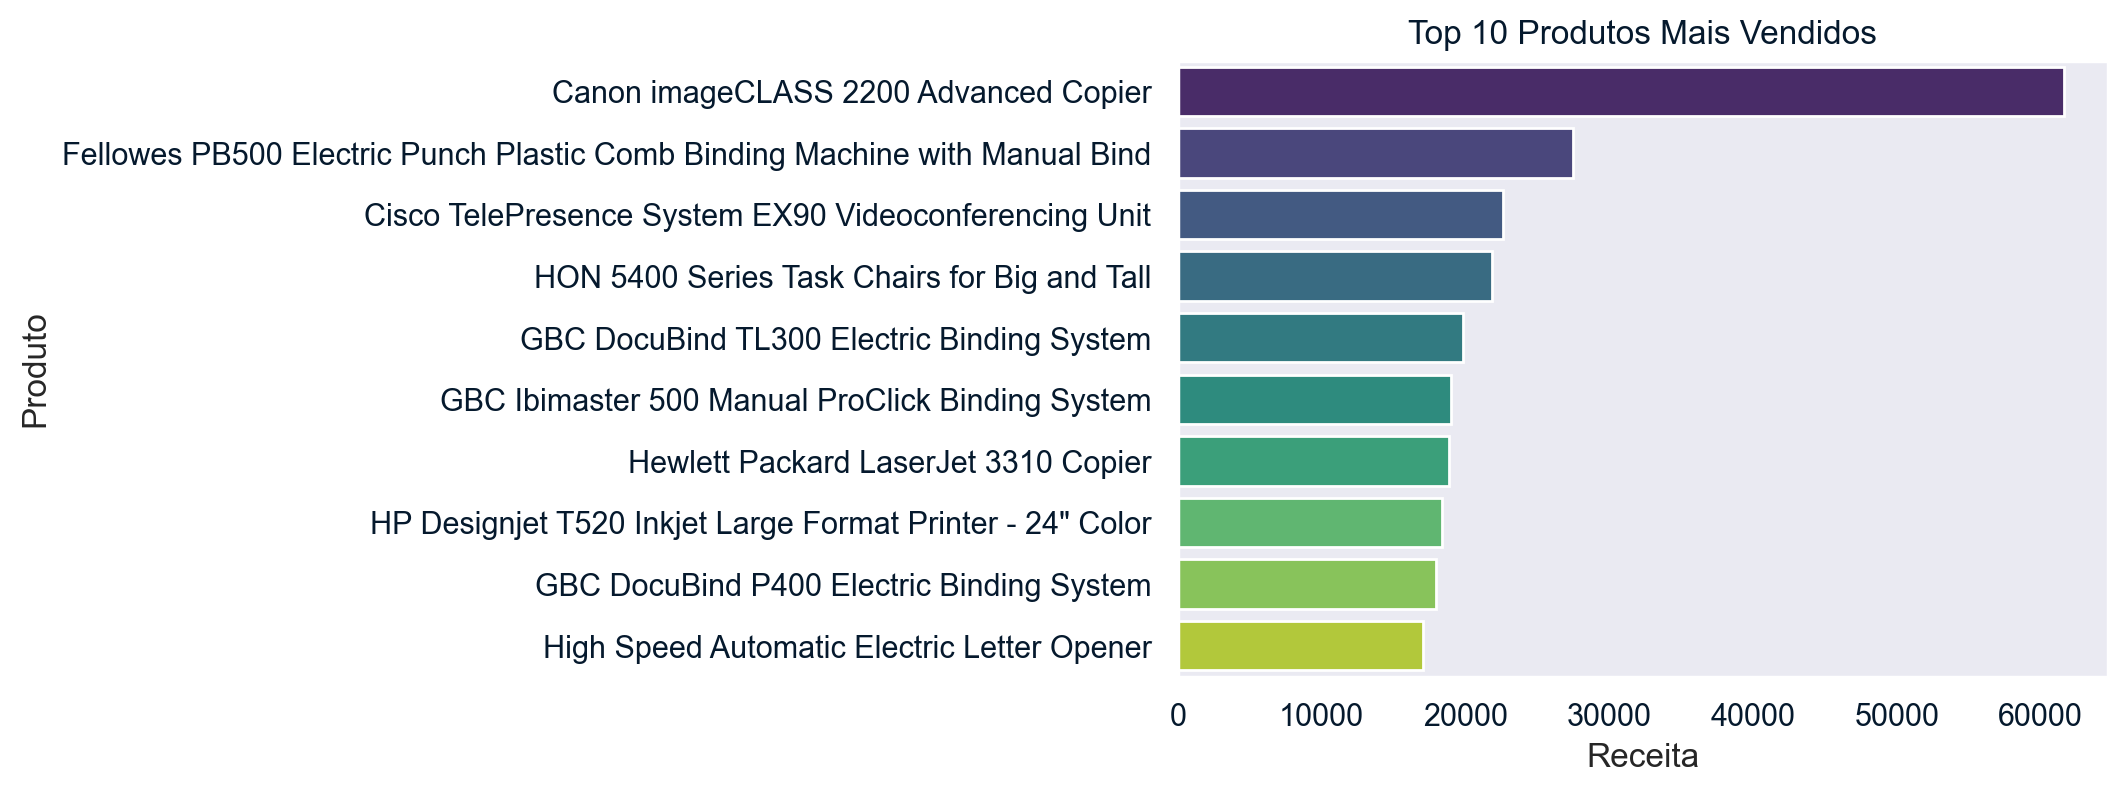

In [32]:
# Produtos mais vendidos
top_products = sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data = top_products, x = 'Sales', y = 'Product Name', palette = 'viridis')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Receita')
plt.ylabel('Produto')
plt.show()


## De onde vem a receita?

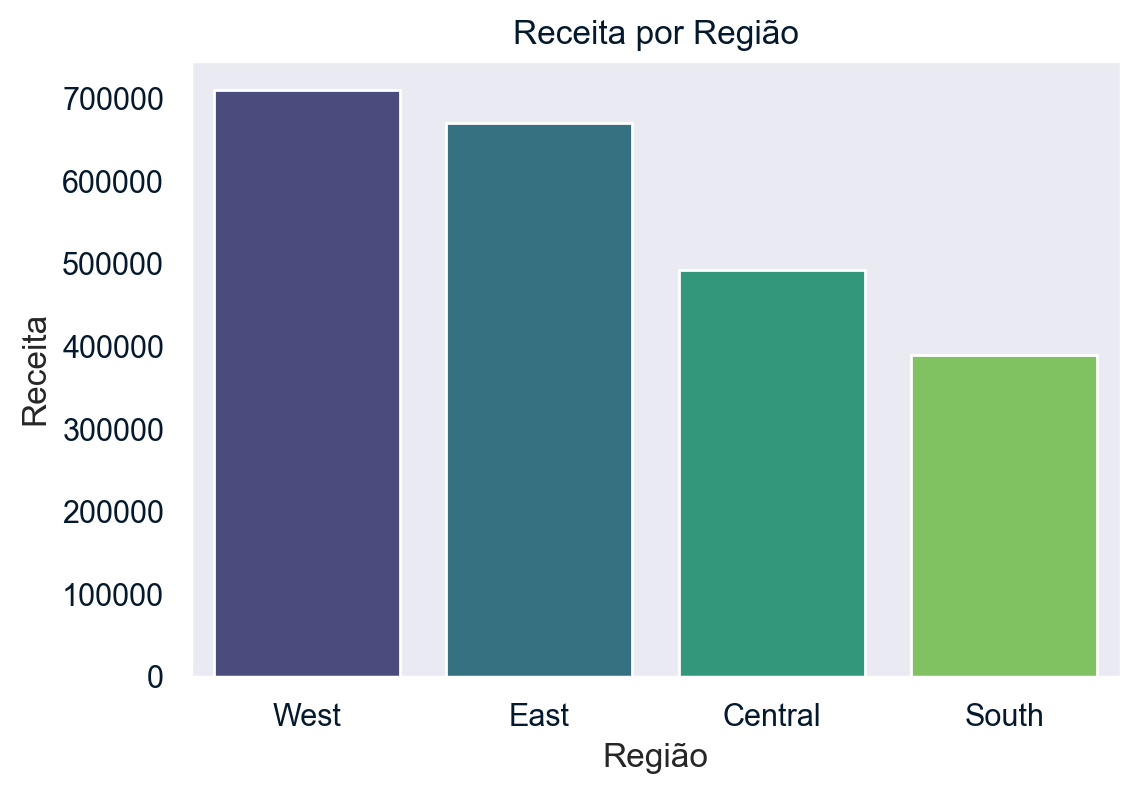

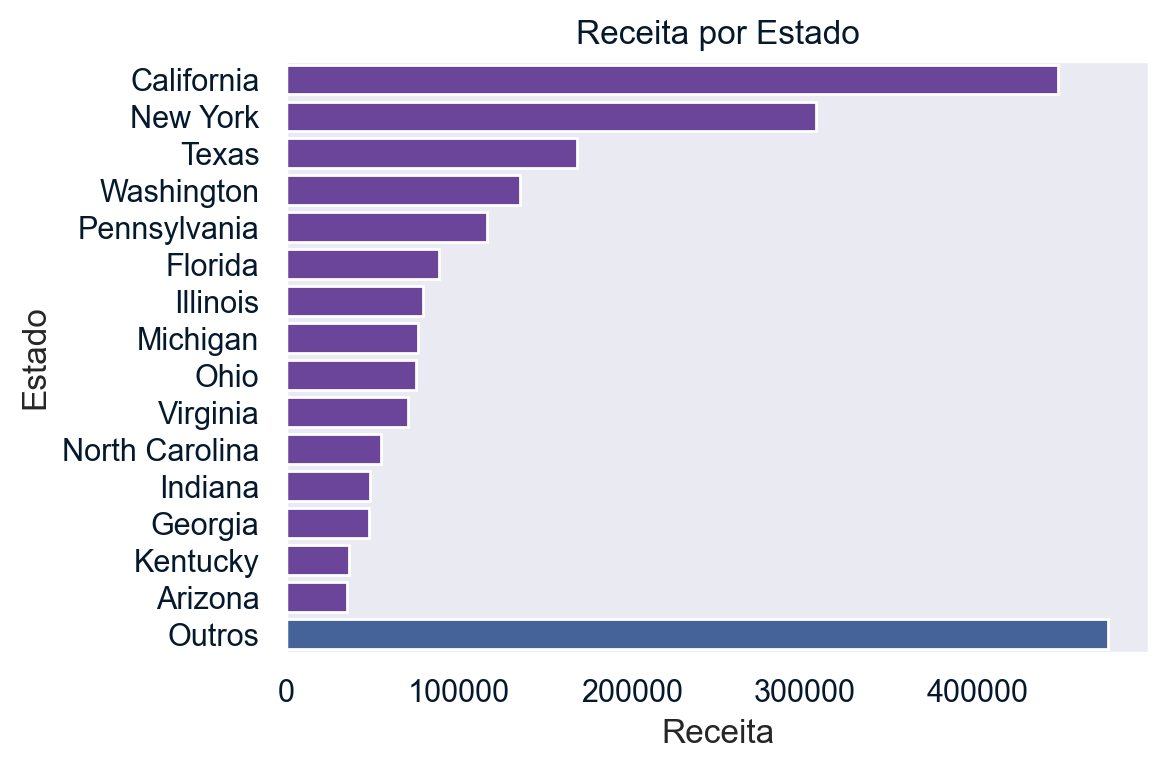

In [33]:
# Vendas por Região
plt.figure(figsize=(6,4))
sales_region = sales.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data = sales_region, x = 'Region', y = 'Sales', palette = 'viridis')
plt.title('Receita por Região')
plt.xlabel('Região')
plt.ylabel('Receita')
plt.show()

# Vendas por Estado
# Agrupar vendas por estado, ordenar e resetar o índice
sales_state = sales.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Separar os 10 maiores e calcular o restante
sales_state_10 = sales_state.iloc[:15]
sales_state_others = sales_state.iloc[15:].sum(numeric_only=True).to_frame().T
sales_state_others['State'] = 'Outros'

# Concatenar os 10 maiores com "Outros"
sales_state_final = pd.concat([sales_state_10, sales_state_others], ignore_index=True)

sales_state_final['color'] = sales_state_final['State'].apply(lambda x: '#375ea7' if x == 'Outros' else '#6a37a7')

# Plotar o gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=sales_state_final, x='Sales', y='State', palette= sales_state_final['color'].to_list())

# Configurações do gráfico
plt.title('Receita por Estado')
plt.xlabel('Receita')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


Estados ricos como California e Nova Iorque são onde ficam os maiores clientes, cobrindo praticamente o dobro que os 35 estados agregados no final do gráfico.

## Qual tipo de envio os clientes preferem?

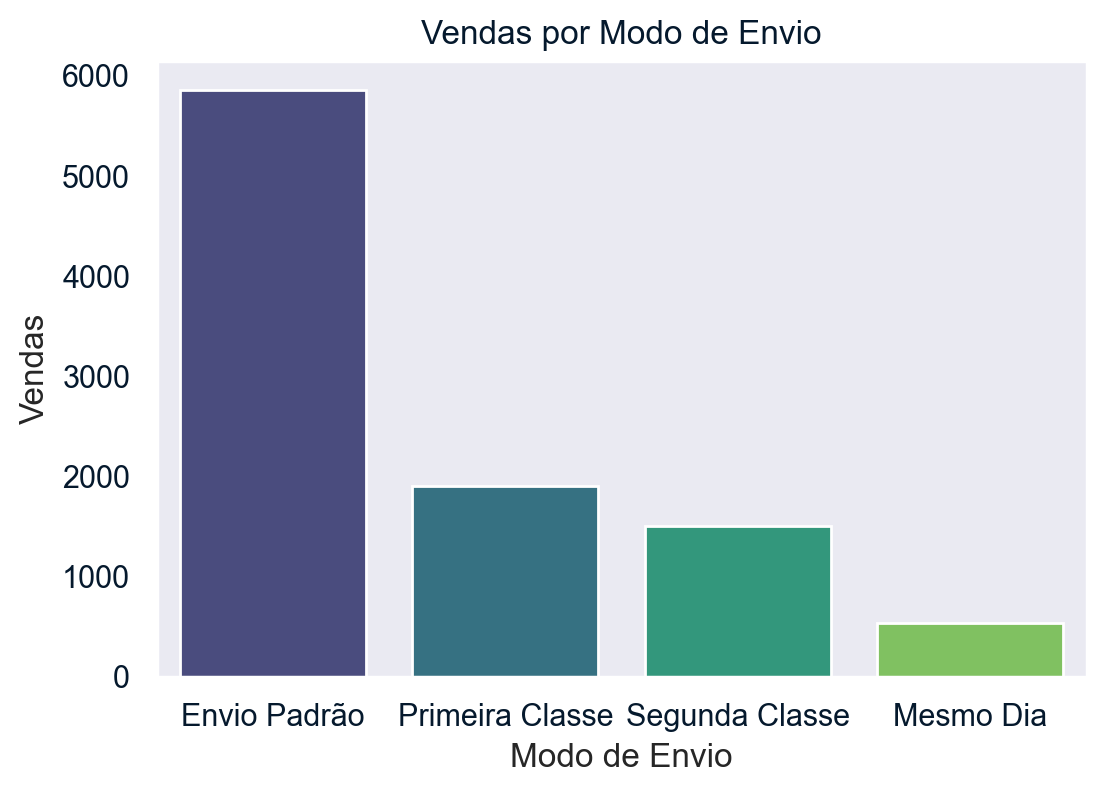

In [34]:
# Vendas por modo de envio
plt.figure(figsize=(6,4))
sales_ship_mode = sales.groupby('Ship Mode')['Row ID'].count().sort_values(ascending=False).reset_index()

xlabels = ['Envio Padrão', 'Primeira Classe', 'Segunda Classe', 'Mesmo Dia']

ax = sns.barplot(data = sales_ship_mode, x = 'Ship Mode', y = 'Row ID', palette = 'viridis')

ax.set_xticklabels(xlabels)
plt.title('Vendas por Modo de Envio')
plt.xlabel('Modo de Envio')
plt.ylabel('Vendas')
plt.show()

A grande maioria dos clientes opta pelo Envio Padrão.

## Há alguma diferença significativa entre os tempos de entrega?

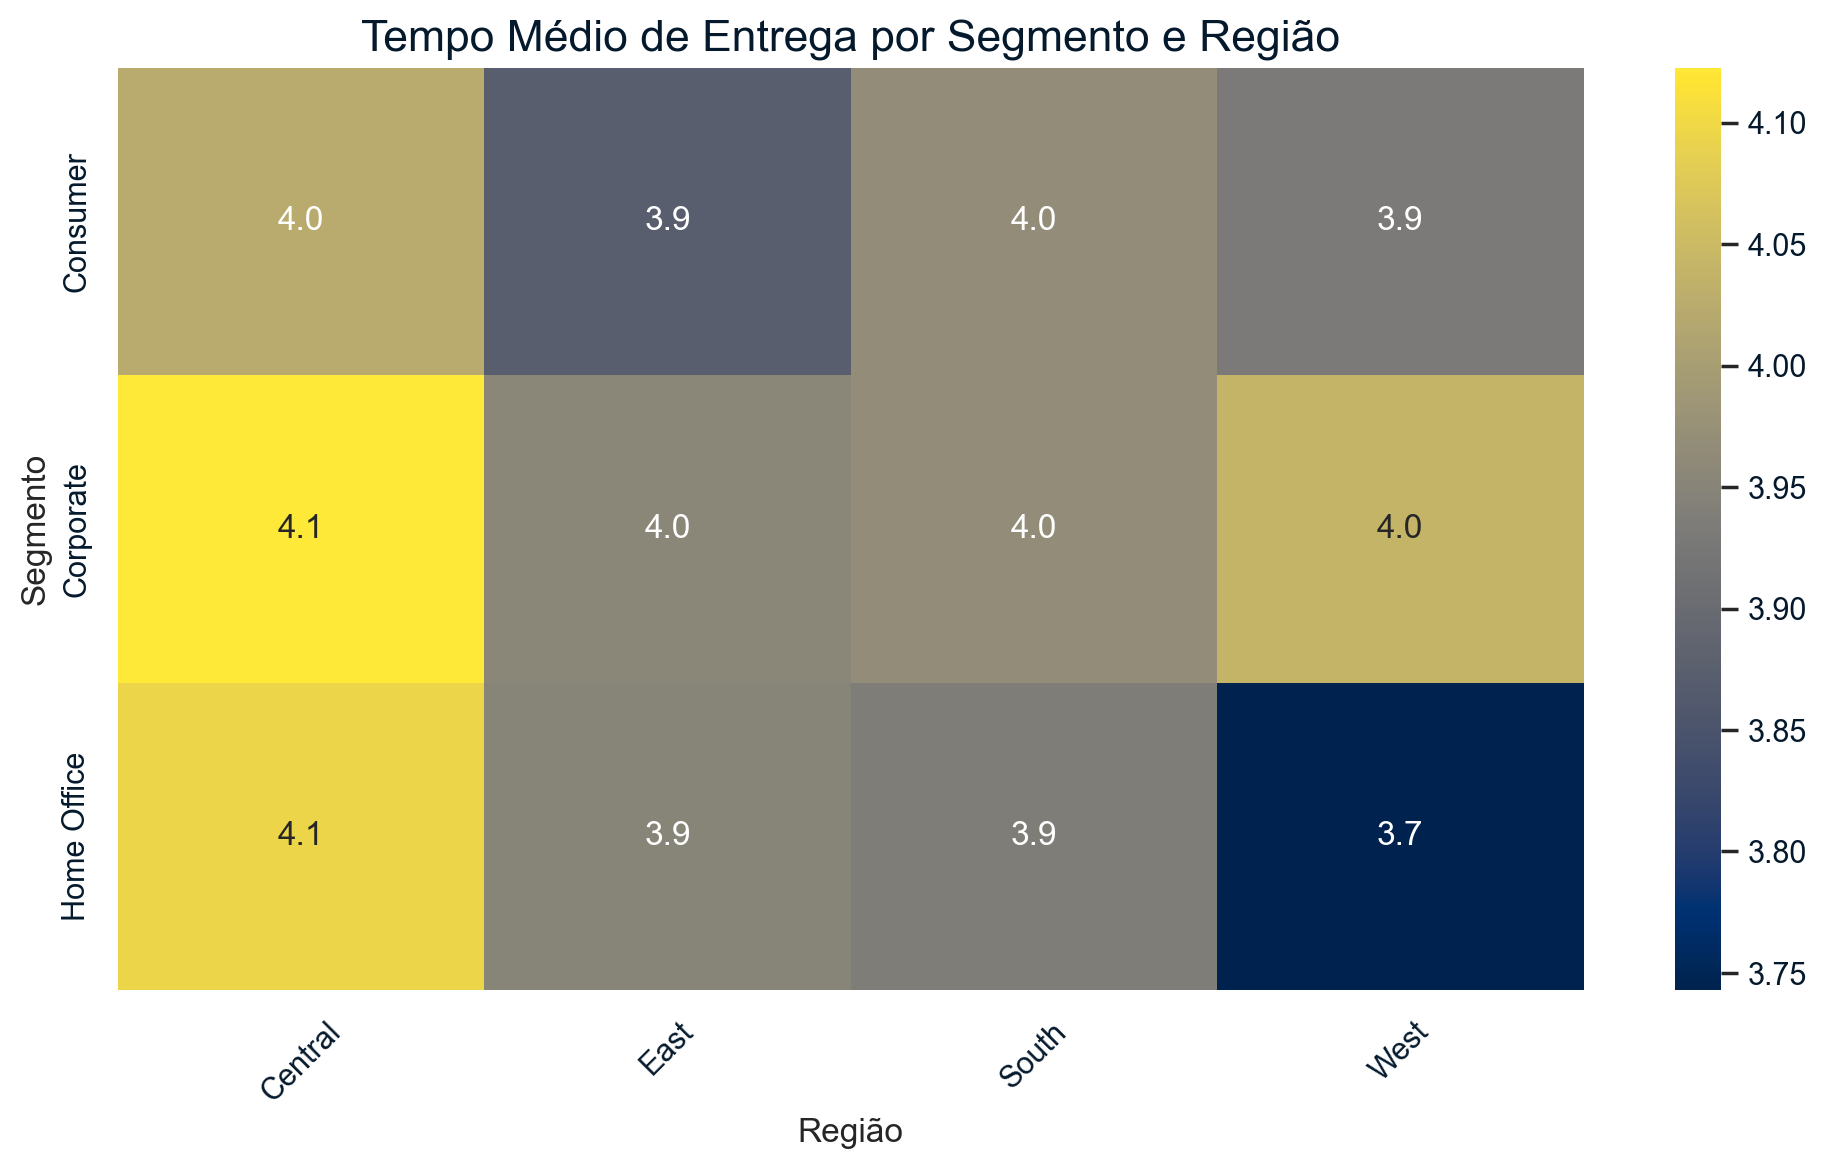

In [35]:
# Tempo médio de entrega
sales['Delivery Time'] = (sales['Ship Date'] - sales['Order Date']).dt.days

# Criar o DataFrame com os dados agrupados
avg_delivery_time = sales.groupby(['Segment', 'Region'])['Delivery Time'].mean().unstack()

# Criar o heatmap
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico
sns.heatmap(avg_delivery_time, annot=True, fmt=".1f", cmap='cividis', cbar=True)

# Personalizar o gráfico
plt.title('Tempo Médio de Entrega por Segmento e Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Segmento', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X para melhor leitura
plt.tight_layout()  # Ajustar o layout para evitar sobreposição

# Mostrar o gráfico
plt.show()

Não vemos diferenças significativas entre o tempo e espera entre os segmentos e regiões, apenas algumas horas de diferença.

## Quantos pedidos temos ao total por mês? Em quais épocas do ano a empresa se destaca?

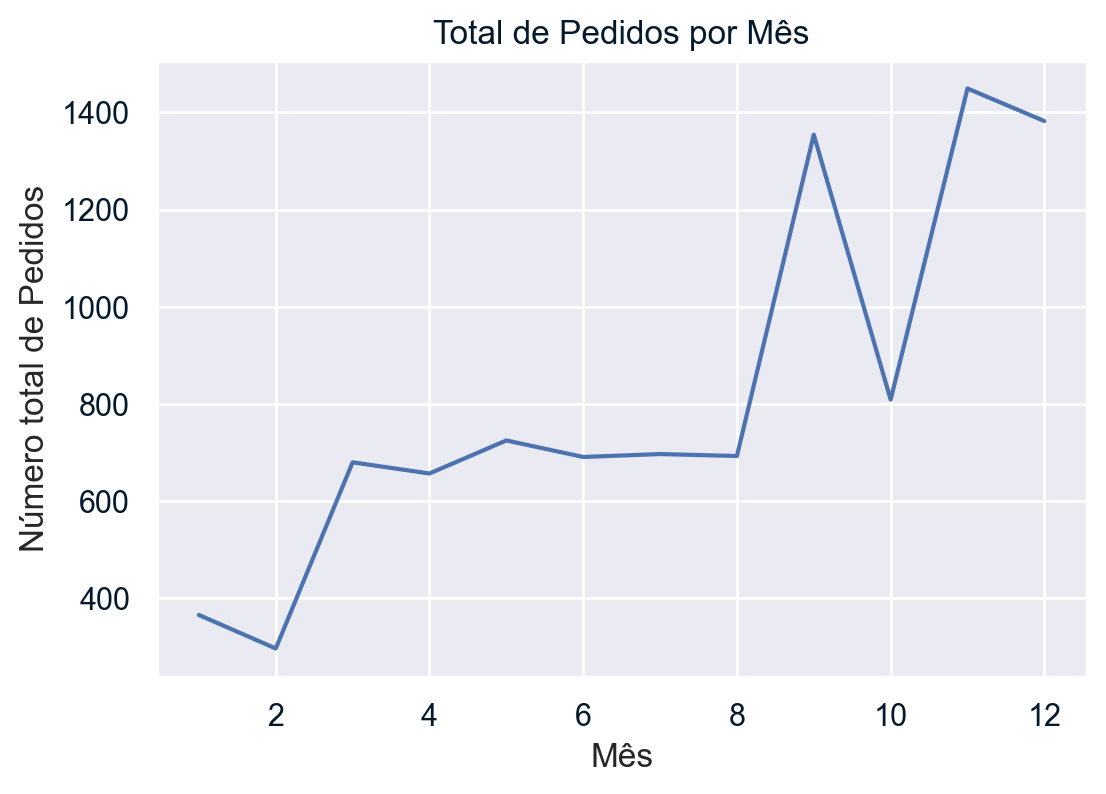

In [36]:
# Adicionando coluna de mês

sales['Month'] = pd.to_datetime(sales['Order Date']).dt.month

sales_by_month = sales.groupby('Month')['Row ID'].count().reset_index()

plt.figure(figsize=(6,4))

sns.lineplot(data = sales_by_month, x = 'Month', y = 'Row ID')

plt.title('Total de Pedidos por Mês')
plt.ylabel('Número total de Pedidos')
plt.xlabel('Mês')
plt.grid()
plt.show()

Os produtos da Superstore parecem ganhar mais popularidade após a metade do ano, tendo alguns picos de vendas durante promoções como a Black Friday e Natal.

## Crescimento da Empresa

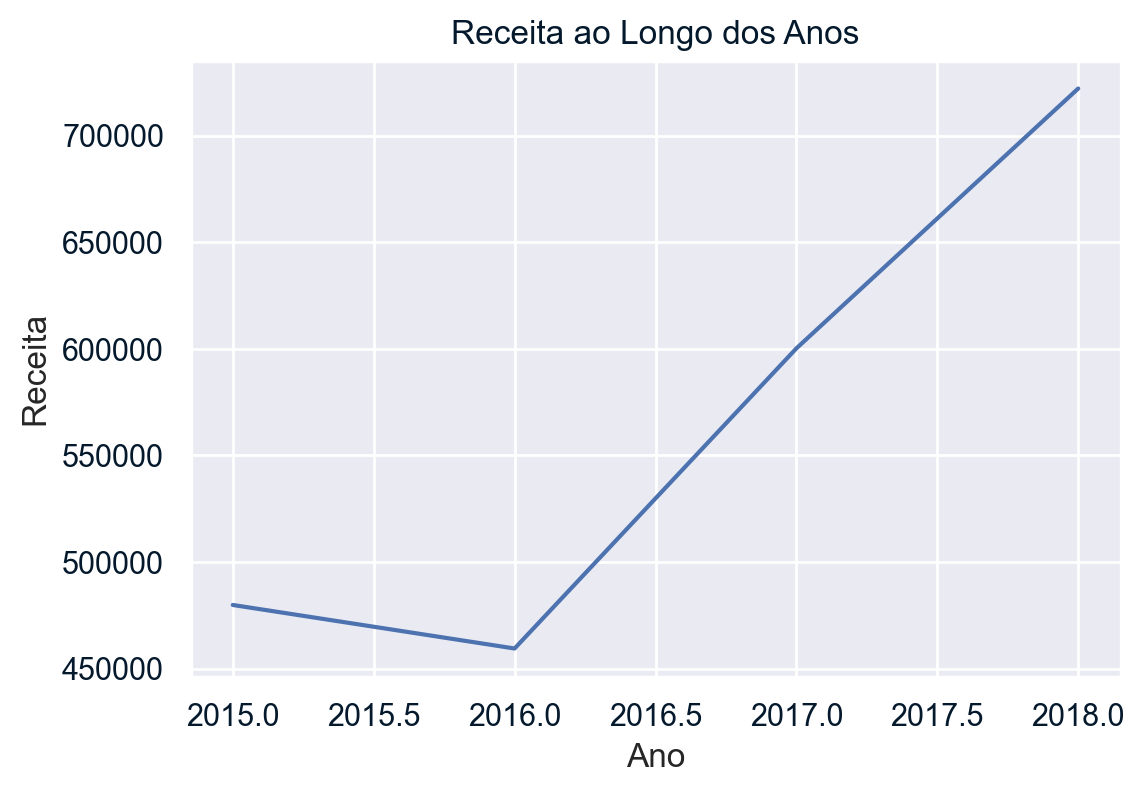

In [37]:
# Análise temporal das vendas ao longo dos anos
sales['Year'] = sales['Order Date'].dt.year
sales_by_year = sales.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
sns.lineplot(data = sales_by_year, x = 'Year', y = 'Sales')
plt.title('Receita ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.show()

Pelo que o Dataset cobre, a empresa tem um crescimento constante de receita com o passar dos anos, exceto por um declínio no primeiro ano de funcionamento.

## Insights e Recomendações:

A empresa tem um crescimento constante com o passar dos anos, mas ainda há algumas lacunas que podem ser melhoradas. Pelos gráficos apresentados seria interessante trabalhar em campanhas para vendas mais constantes ao longo do ano, com a possibilidade de expansão da popularidade da empresa em estados com vendas medianas, com enfoque nos produtos principais.